<a href="https://colab.research.google.com/github/ldockx/my-first-data-engineering-project/blob/add-strava-api/first_data_engineering_effort.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import requests
import pandas as pd
from datetime import datetime

# --- 1. Setup ---
API_KEY = "c726ffef4bc80d66ba1b86881e30dea3"  # get a free one at https://openweathermap.org/api
CITY = "Bruges"
URL = f"http://api.openweathermap.org/data/2.5/weather?q={CITY}&appid={API_KEY}&units=metric"

# --- 2. Extract ---
response = requests.get(URL)
data = response.json()

#print(data)

# --- 3. Transform ---
# Flatten useful fields into a dict
weather_dict = {
    "city": data["name"],
    "temperature_C": data["main"]["temp"],
    "feels_like_C": data["main"]["feels_like"],
    "humidity_%": data["main"]["humidity"],
    "weather": data["weather"][0]["description"],
    "wind_speed_mps": data["wind"]["speed"],
    "timestamp": datetime.utcfromtimestamp(data["dt"])
}

# Convert to DataFrame for analysis
df = pd.DataFrame([weather_dict])

# --- 4. Load (for now, just display) ---
print(df)

# Optionally save to CSV
#df.to_csv("weather_data.csv", index=False)


     city  temperature_C  feels_like_C  humidity_%     weather  \
0  Bruges          13.93          13.6          85  light rain   

   wind_speed_mps           timestamp  
0           10.52 2025-10-04 07:05:06  


/tmp/ipython-input-2939271285.py:25: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  "timestamp": datetime.utcfromtimestamp(data["dt"])


In [6]:
#forecast

import requests
import pandas as pd
from datetime import datetime

# --- Setup ---
API_KEY = "c726ffef4bc80d66ba1b86881e30dea3"   # Get free key from openweathermap.org
CITY = "Bruges"
URL = f"http://api.openweathermap.org/data/2.5/forecast?q={CITY}&appid={API_KEY}&units=metric"

# --- Extract ---
response = requests.get(URL)
data = response.json()

# --- Transform ---
# Flatten forecast list into a table
forecast_list = []
for item in data["list"]:
    forecast_list.append({
        "city": data["city"]["name"],
        "datetime": datetime.utcfromtimestamp(item["dt"]),
        "temperature_C": item["main"]["temp"],
        "feels_like_C": item["main"]["feels_like"],
        "humidity_%": item["main"]["humidity"],
        "weather": item["weather"][0]["description"],
        "wind_speed_mps": item["wind"]["speed"]
    })

df = pd.DataFrame(forecast_list)

# --- Load ---
print(df.head())

# Save to CSV (acts as the "Load" step of ETL)
df.to_csv("weather_forecast.csv", index=False)


     city            datetime  temperature_C  feels_like_C  humidity_%  \
0  Bruges 2025-10-04 09:00:00          13.44         13.03          84   
1  Bruges 2025-10-04 12:00:00          15.51         14.84          66   
2  Bruges 2025-10-04 15:00:00          13.31         12.21          58   
3  Bruges 2025-10-04 18:00:00          12.98         12.11          68   
4  Bruges 2025-10-04 21:00:00          13.78         12.83          62   

      weather  wind_speed_mps  
0  light rain           12.08  
1  light rain           13.09  
2  light rain           14.03  
3  light rain           11.93  
4  light rain           11.40  


/tmp/ipython-input-4267610416.py:22: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  "datetime": datetime.utcfromtimestamp(item["dt"]),


Text(0, 0.5, 'Forecasted Temperature')

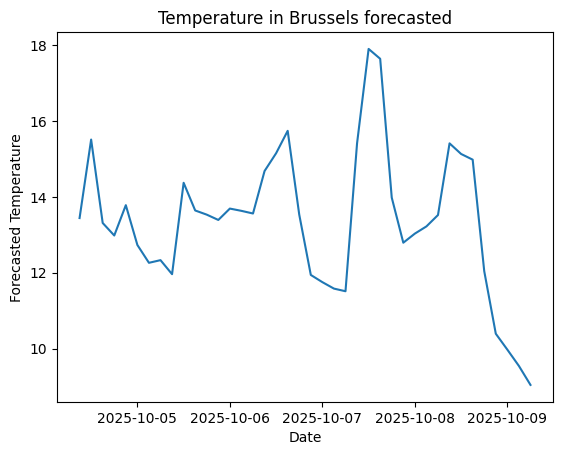

In [7]:
import matplotlib.pyplot as plt

x = df["datetime"]
y = df["temperature_C"]
plt.plot(x,y)
plt.title("Temperature in Brussels forecasted")
plt.xlabel("Date")
plt.ylabel("Forecasted Temperature")

In [11]:
!pip install stravalib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.4/125.4 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 305.5/305.5 kB 8.1 MB/s eta 0:00:00


In [23]:
# Use webbrowser to launch a browser from Python
import webbrowser
import json
import stravalib

from stravalib.client import Client

client_id = "179478"
access_token = "860ce79dd00f6223f42b52af60c8c87fd7915a53"


client = Client()

# Read-only scope values
request_scope = ["read_all", "profile:read_all", "activity:read_all"]

# Create a localhost URL
redirect_url = "http://127.0.0.1:5000/authorization"
# Define a read-only scope
request_scope = ["read_all", "profile:read_all", "activity:read_all"]

# Create an authorization URL using stravalib
url = client.authorization_url(
    client_id=client_id,
    redirect_uri=redirect_url,
    scope=request_scope,
)

print(url)

# 'https://www.strava.com/oauth/authorize?client_id=123456&redirect_uri=http%3A%2F%2F127.0.0.1%3A5000%2Fauthorization&approval_prompt=auto&response_type=code&scope=read_all%2Cprofile%3Aread_all%2Cactivity%3Aread_all'

# Open the url that you created above in a web browser
webbrowser.open(url)
print(
    """You will see a URL that looks like this:
    http://127.0.0.1:5000/authorization?state=&code=12323423423423423423423550&scope=read,activity:read_all,profile:read_all,read_all
    Copy the values between code= and & in the URL that you see in the browser."""
)
# Using input allows you to copy the code into your Python console (or Jupyter Notebook)
code = input("Please enter the code that you received: ")

print(
    f"Great! Your code is {code}\n"
    "Next, I will exchange that code for a token.\n"
    "I only have to do this once."
)

https://www.strava.com/oauth/authorize?client_id=179478&redirect_uri=http%3A%2F%2F127.0.0.1%3A5000%2Fauthorization&approval_prompt=auto&scope=read_all%2Cprofile%3Aread_all%2Cactivity%3Aread_all&response_type=code
You will see a URL that looks like this:
    http://127.0.0.1:5000/authorization?state=&code=12323423423423423423423550&scope=read,activity:read_all,profile:read_all,read_all
    Copy the values between code= and & in the URL that you see in the browser.
Please enter the code that you received: 4ae16924adf1eabf0d8f5eff9d2ae516c2144b8a
Great! Your code is 4ae16924adf1eabf0d8f5eff9d2ae516c2144b8a
Next, I will exchange that code for a token.
I only have to do this once.


In [24]:
client_secret = "22acdfc6850d9a81a189b4a42d9b4fa8fead0dfb"

token_response = client.exchange_code_for_token(
    client_id=client_id, client_secret=client_secret, code=code
)
print(token_response)

# Save the token response as a JSON file
#with open(json_path, "w") as f:
#    json.dump(token_response, f)

print("Token saved - hooray!")

# Access and refresh tokens
access_token = token_response["access_token"]
refresh_token = token_response["refresh_token"]  # Use this after 6 hours

{'access_token': 'eb0949ca74c02fe2e26569f0606a08248ea8b55c', 'refresh_token': '99ef40a0681db2d625f1e43531b91d6c516a6949', 'expires_at': 1759586032}
Token saved - hooray!


In [26]:
# Open the token JSON file that you saved earlier
#with open(json_path, "r") as f:
#    token_response_refresh = json.load(f)

token_response_refresh = {'access_token': 'eb0949ca74c02fe2e26569f0606a08248ea8b55c', 'refresh_token': '99ef40a0681db2d625f1e43531b91d6c516a6949', 'expires_at': 1759586032}

print(token_response_refresh)

# Output:
# {'access_token': 'ab0667a99d17b7c278d9f730f733ad09016306cf',
# 'refresh_token':  '9f8d5689c93e83c7b0c69a8585010d4762e8b2ac',
#  'expires_at': 1726560054}

{'access_token': 'eb0949ca74c02fe2e26569f0606a08248ea8b55c', 'refresh_token': '99ef40a0681db2d625f1e43531b91d6c516a6949', 'expires_at': 1759586032}


In [27]:
refresh_response = client.refresh_access_token(
    client_id=client_id,  # Stored in the secrets.txt file above
    client_secret=client_secret,
    refresh_token=refresh_token,  # Stored in your JSON file
)

# Check that the refresh worked
client.get_athlete()

# View the newly refreshed token
print(client.access_token)

eb0949ca74c02fe2e26569f0606a08248ea8b55c


access token = eb0949ca74c02fe2e26569f0606a08248ea8b55c


In [28]:
import requests
import json

# Replace these with your own Strava API credentials
CLIENT_ID = client_id
CLIENT_SECRET = client_secret
REFRESH_TOKEN = refresh_token

# Step 1: Get a new access token using your refresh token
def get_access_token():
    auth_url = "https://www.strava.com/oauth/token"
    payload = {
        "client_id": CLIENT_ID,
        "client_secret": CLIENT_SECRET,
        "refresh_token": REFRESH_TOKEN,
        "grant_type": "refresh_token"
    }
    response = requests.post(auth_url, data=payload)
    response.raise_for_status()
    access_token = response.json()["access_token"]
    return access_token

# Step 2: Get activities using the access token
def get_activities(access_token, per_page=30, page=1):
    activities_url = "https://www.strava.com/api/v3/athlete/activities"
    headers = {"Authorization": f"Bearer {access_token}"}
    params = {"per_page": per_page, "page": page}
    response = requests.get(activities_url, headers=headers, params=params)
    response.raise_for_status()
    return response.json()

if __name__ == "__main__":
    token = get_access_token()
    activities = get_activities(token, per_page=10, page=1)

    # Print activities in readable format
    print(json.dumps(activities, indent=2))


[
  {
    "resource_state": 2,
    "athlete": {
      "id": 54565248,
      "resource_state": 1
    },
    "name": "Avondloop",
    "distance": 8069.6,
    "moving_time": 2371,
    "elapsed_time": 2371,
    "total_elevation_gain": 4.0,
    "type": "Run",
    "sport_type": "Run",
    "workout_type": null,
    "id": 16000509899,
    "start_date": "2025-10-01T16:18:48Z",
    "start_date_local": "2025-10-01T18:18:48Z",
    "timezone": "(GMT+01:00) Europe/Brussels",
    "utc_offset": 7200.0,
    "location_city": null,
    "location_state": null,
    "location_country": null,
    "achievement_count": 2,
    "kudos_count": 13,
    "comment_count": 1,
    "athlete_count": 1,
    "photo_count": 0,
    "map": {
      "id": "a16000509899",
      "summary_polyline": "omovHqo~ZFk@p@{@tAsBNMVc@^c@^k@Da@JINGNCv@c@HHDLRfAFb@J`@NfBB`APzCXdCJl@HlA@`BBl@EhA@rBAZ?pAR`I?XFr@HdDD`DA`CJ`DAl@BdFP~AJr@n@vFLr@d@~D?d@Df@H`@@n@Db@DhBAZ@~@E~Ci@zE_@pCQxB{@rGElAHbCFjAEf@SpAGZWtBa@bCGr@CHW`BSlBIhB?d@EnAA~@Ev@?fAHd@HJ